# **Timeline_Analysis_Covid_19**

## **Task 8#** 
Create a Storyboard showing spread Of Covid-19 Cases in your country or any region
# **The Goal**

use animation, timeline and annotations to create attractive and intractive dashboard and story

### **The Author** :- **Mina Adel Markos**



# **About Dataset :-**

The data you find here and our data sources

-  **Confirmed** cases and deaths: our data comes from the COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University (JHU). We discuss how and when JHU collects and publishes this data here. The cases & deaths dataset is updated daily.
Note: confirmed cases and deaths are collected by Johns Hopkins University by date of report, rathen than date of test/death. Therefore the number they report on a given day does not necessarily represent the actual number on that date, because of the long reporting chain that exists between a new case/death and its inclusion in statistics. This also means that time series can show sudden changes (negative or positive) when a country corrects historical data, because it had previously under- or overestimated the number of cases/deaths.

-  **Hospitalizations and intensive care unit (ICU) admissions:** our data is collected from official sources and collated by Our World in Data. The complete list of country-by-country sources is available here.
-  **Testing for COVID-19:** this data is collected by the Our World in Data team from official reports; you can find further details in our post on COVID-19 testing, including our checklist of questions to understand testing data, information on geographical and temporal coverage, and detailed country-by-country source information. On 23 June 2022, we stopped adding new datapoints to our COVID-19

testing dataset. You can read more here.
-  **Vaccinations** against COVID-19: this data is collected by the Our World in Data team from official reports.
Other variables: this data is collected from a variety of sources (United Nations, World Bank, Global Burden of Disease, Blavatnik School of Government, etc.). More information is available in our codebook.

# **Importing Libraries**

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import kaleido
pio.templates.default = 'plotly_white'

In [6]:
df = pd.read_csv('covid_2.csv')

In [7]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [8]:
df.shape

(37243, 67)

In [9]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.714000e+04,3.711100e+04,36926.000000,3.513700e+04,35134.000000,34943.000000,37140.000000,37111.000000,36926.000000,35137.000000,...,22516.000000,15832.000000,28151.000000,35148.000000,30169.000000,3.724200e+04,928.000000,928.000000,928.000000,928.000000
mean,3.126307e+06,7.720443e+03,7728.423154,4.603283e+04,80.122787,80.490103,70601.425782,188.727767,189.104647,807.040834,...,33.148721,53.928141,3.177594,74.331068,0.736616,1.940779e+08,26743.061099,10.219709,16.249537,1686.512525
std,1.655272e+07,4.442279e+04,43865.368668,1.849084e+05,376.015733,369.348473,114567.605508,759.564425,526.289587,1072.591315,...,11.752964,34.095665,2.517417,6.504957,0.135669,8.090719e+08,96664.265440,12.561388,28.967283,2447.045408
min,1.000000e+00,0.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.001000,...,12.300000,2.735000,0.400000,59.290000,0.433000,1.587700e+04,-8805.400000,-10.980000,-55.330000,-1043.863573
25%,4.410000e+03,0.000000e+00,7.000000,6.700000e+01,0.000000,0.000000,1385.484500,0.000000,2.008000,31.992000,...,23.900000,25.383000,1.100000,71.780000,0.632000,4.099890e+05,24.925000,0.415000,0.170000,13.653348
50%,4.441350e+04,3.900000e+01,74.571000,8.230000e+02,0.000000,1.000000,12383.554500,6.006000,23.275000,254.970000,...,31.400000,66.229000,2.700000,75.860000,0.776000,8.939617e+06,7603.050000,8.205000,7.930000,841.311211
75%,3.794468e+05,6.450000e+02,785.107250,8.622000e+03,10.000000,10.571000,90962.025000,101.652000,161.802250,1279.700000,...,44.400000,88.469000,4.700000,78.570000,0.823000,2.617741e+07,19240.200000,16.825000,21.447500,2094.304215
max,1.986765e+08,1.100819e+06,884662.857000,1.508127e+06,6662.000000,5720.714000,629688.386000,50273.547000,9383.350000,5614.310000,...,52.100000,97.164000,11.000000,83.730000,0.944000,4.721383e+09,820115.400000,56.240000,245.440000,10032.844512


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37243 entries, 0 to 37242
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    37243 non-null  object 
 1   continent                                   35149 non-null  object 
 2   location                                    37243 non-null  object 
 3   date                                        37243 non-null  object 
 4   total_cases                                 37140 non-null  float64
 5   new_cases                                   37111 non-null  float64
 6   new_cases_smoothed                          36926 non-null  float64
 7   total_deaths                                35137 non-null  float64
 8   new_deaths                                  35134 non-null  float64
 9   new_deaths_smoothed                         34943 non-null  float64
 10  total_case

In [11]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 67)


In [12]:
# calculate sum null value in dataset
df.isna().sum()

iso_code                                       0
continent                                   2094
location                                       0
date                                           0
total_cases                                  103
                                           ...  
population                                     1
excess_mortality_cumulative_absolute       36315
excess_mortality_cumulative                36315
excess_mortality                           36315
excess_mortality_cumulative_per_million    36315
Length: 67, dtype: int64

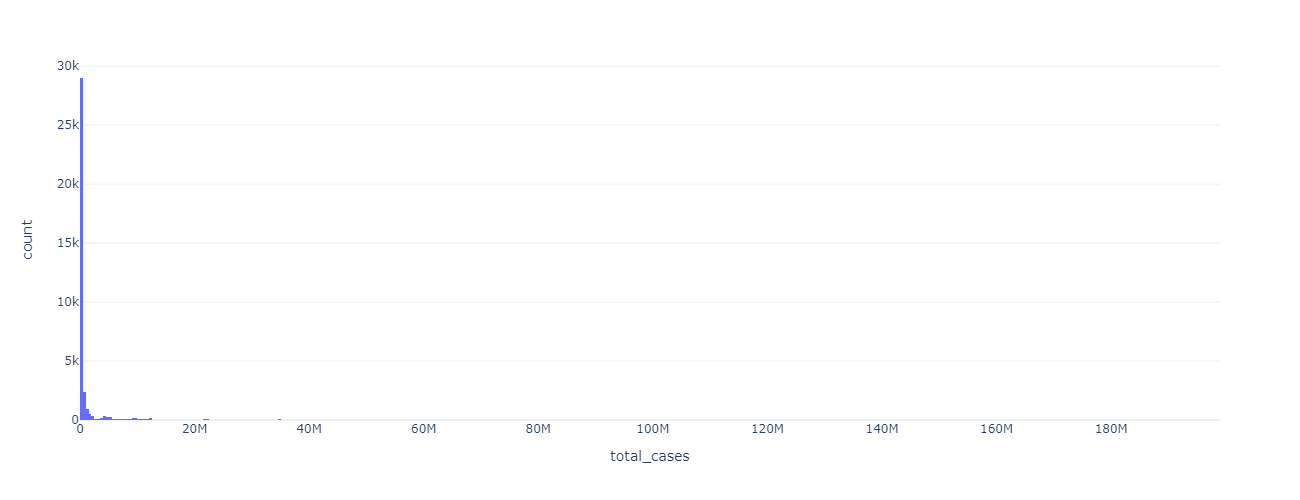

In [13]:
fig1 = px.histogram(df, x="total_cases")
fig1.show("png",width=1300)

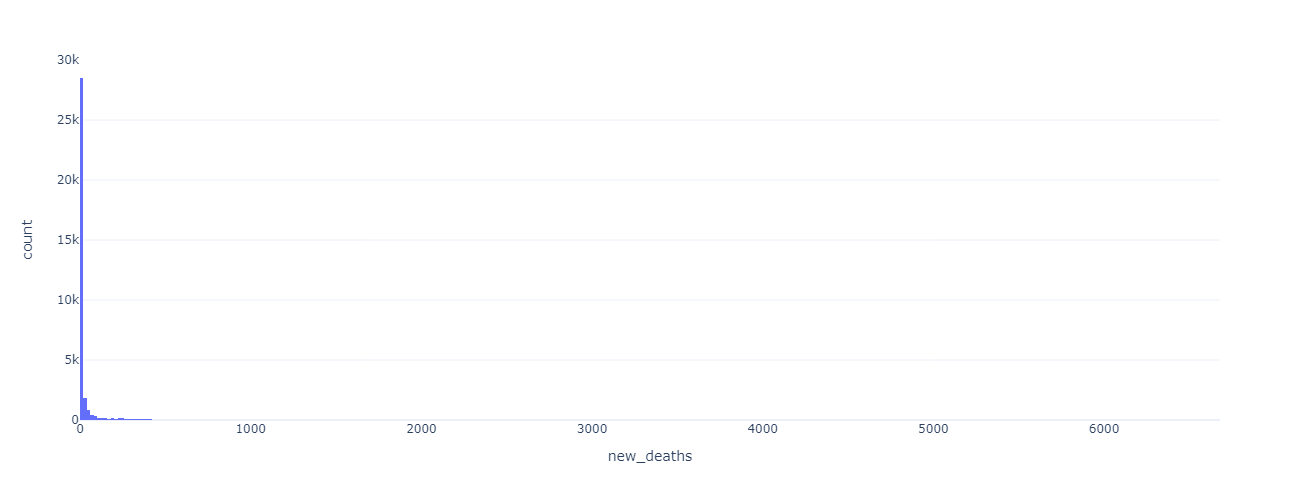

In [14]:
fig2 = px.histogram(df, x="new_deaths")
fig2.show("png",width=1300)

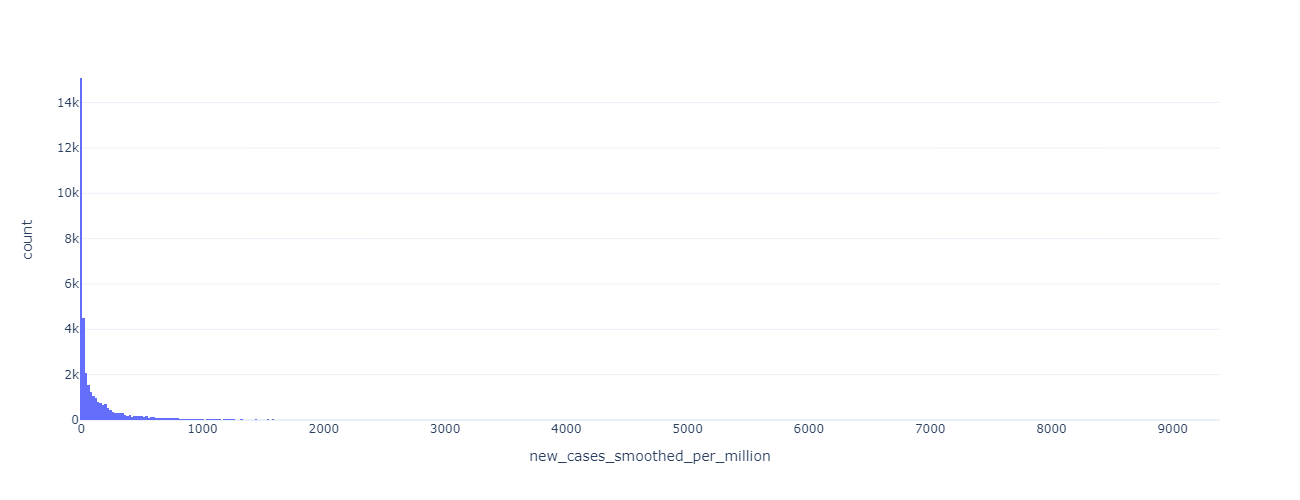

In [15]:
fig3 = px.histogram(df, x="new_cases_smoothed_per_million")
fig3.show("png",width=1300)

In [16]:
# summry for datatype Object
df.describe(include='O')

,iso_code,continent,location,date,tests_units
count,37243,35149,37243,37243,15034
unique,37,6,37,1079,4
top,ARG,North America,Argentina,2021-08-16,tests performed
freq,1079,8990,1079,37,13445


In [17]:
#unique no. of rows in each columns
df.nunique()

iso_code                                      37
continent                                      6
location                                      37
date                                        1079
total_cases                                22603
                                           ...  
population                                    37
excess_mortality_cumulative_absolute         922
excess_mortality_cumulative                  783
excess_mortality                             857
excess_mortality_cumulative_per_million      926
Length: 67, dtype: int64

In [18]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon'], dtype=object)

In [19]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-02-24,5.0,5.0,NaN,NaN,NaN
1,2020-02-25,5.0,0.0,NaN,NaN,NaN
2,2020-02-26,5.0,0.0,NaN,NaN,NaN
3,2020-02-27,5.0,0.0,NaN,NaN,NaN
4,2020-02-28,5.0,0.0,NaN,NaN,NaN


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37243 entries, 0 to 37242
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          37243 non-null  object 
 1   total_cases   37140 non-null  float64
 2   new_cases     37111 non-null  float64
 3   total_deaths  35137 non-null  float64
 4   new_tests     9066 non-null   float64
 5   total_tests   10279 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.7+ MB


In [21]:
df1['date'] = pd.to_datetime(df1['date'],errors='coerce')

In [22]:
df1['month_name'] = df1['date'].dt.month_name()
df1['month'] = df1['date'].dt.month
df1['year'] = df1['date'].dt.year
df1['day'] = df1['date'].dt.day

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37243 entries, 0 to 37242
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          37243 non-null  datetime64[ns]
 1   total_cases   37140 non-null  float64       
 2   new_cases     37111 non-null  float64       
 3   total_deaths  35137 non-null  float64       
 4   new_tests     9066 non-null   float64       
 5   total_tests   10279 non-null  float64       
 6   month_name    37243 non-null  object        
 7   month         37243 non-null  int64         
 8   year          37243 non-null  int64         
 9   day           37243 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 2.8+ MB


In [24]:
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests,month_name,month,year,day
0,2020-02-24,5.0,5.0,NaN,NaN,NaN,February,2,2020,24
1,2020-02-25,5.0,0.0,NaN,NaN,NaN,February,2,2020,25
2,2020-02-26,5.0,0.0,NaN,NaN,NaN,February,2,2020,26
3,2020-02-27,5.0,0.0,NaN,NaN,NaN,February,2,2020,27
4,2020-02-28,5.0,0.0,NaN,NaN,NaN,February,2,2020,28


In [25]:
df1['month_name'].unique()

array(['February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'January'],
      dtype=object)

In [26]:
df2 = df1.groupby(['date','year','month','day','month_name']).agg({
    'total_cases':'mean',
    'new_cases':'mean',
    'total_deaths':'mean',
    'new_tests':'mean'
}).reset_index()
                         

In [27]:
df2.head(2)

,date,year,month,day,month_name,total_cases,new_cases,total_deaths,new_tests
0,2020-01-01,2020,1,1,January,NaN,NaN,NaN,4.0
1,2020-01-02,2020,1,2,January,NaN,NaN,NaN,95.0


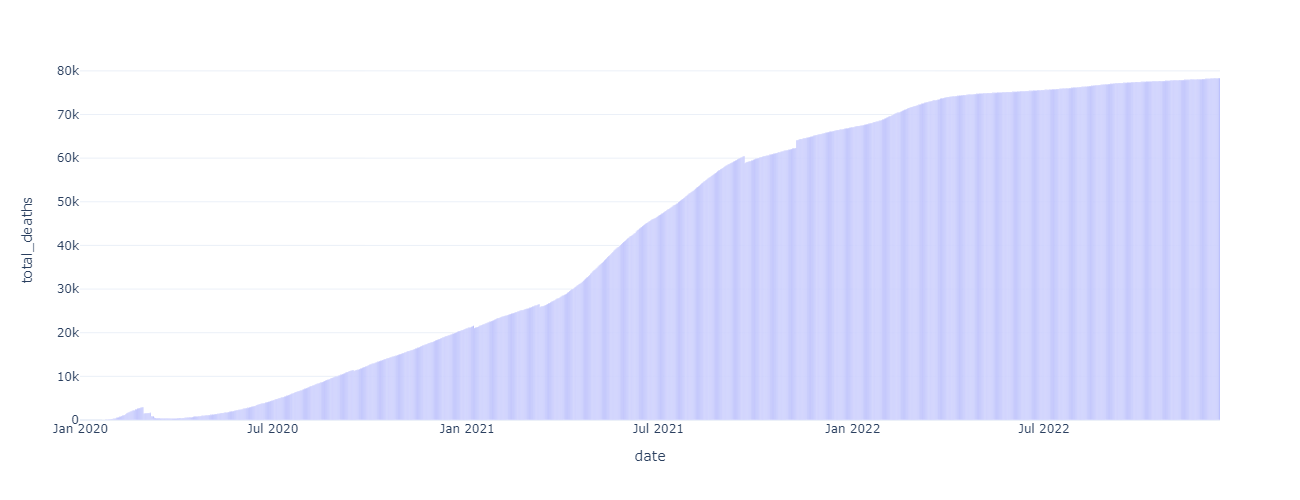

In [28]:
fig4 = px.bar(df2, x="date",y='total_deaths')
fig4.show("png",width=1300)

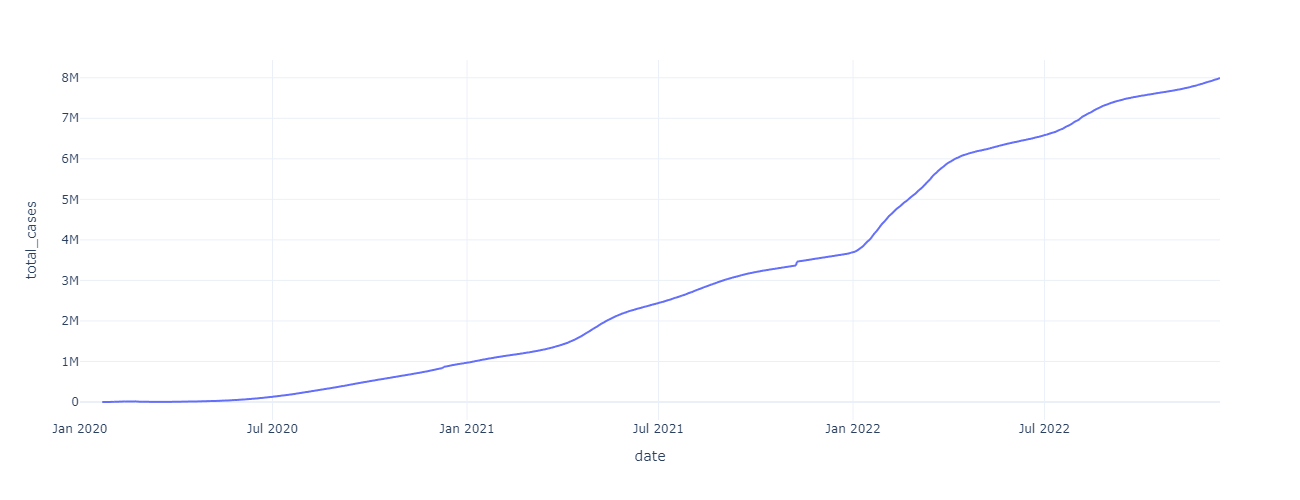

In [29]:
fig5 = px.line(df2, x="date",y='total_cases')
fig5.show("png",width=1300)

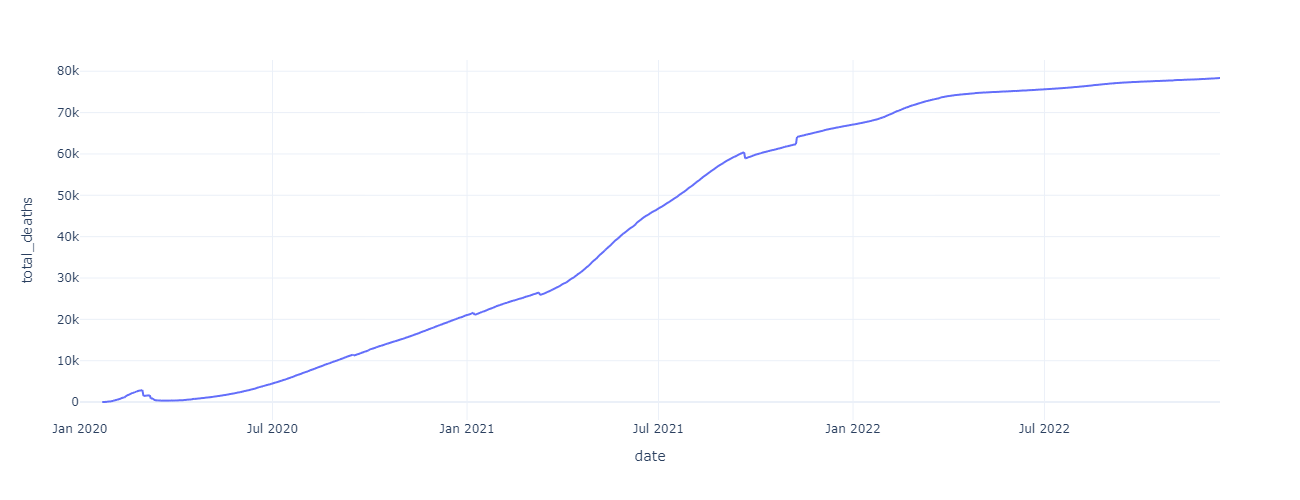

In [30]:
fig5=px.line(df2, x="date",y='total_deaths')
fig5.show("png",width=1300)

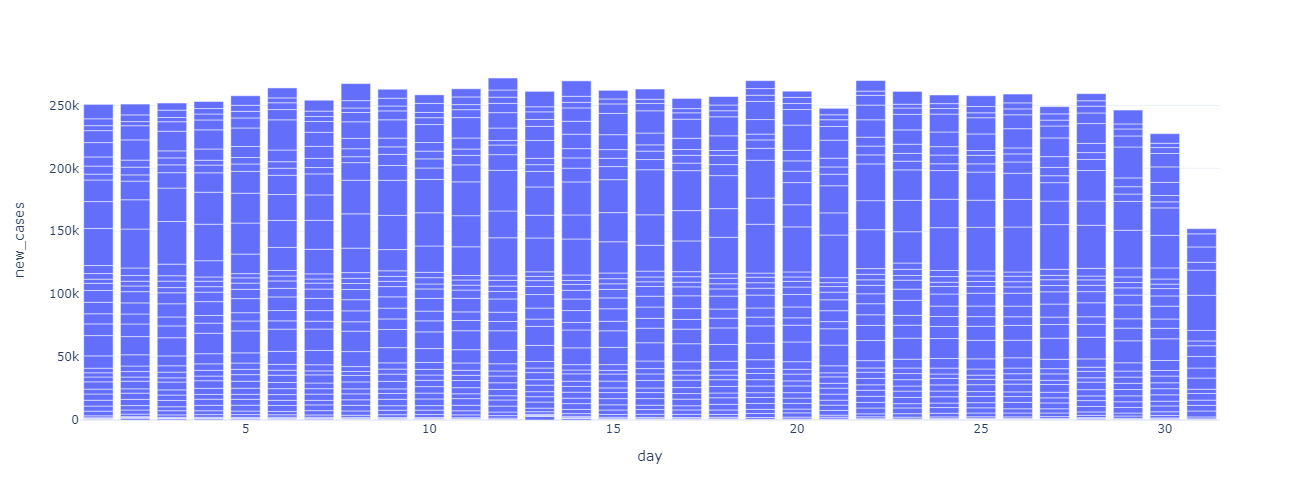

In [31]:
fig6 = px.bar(df2, x="day",y='new_cases')
fig6.show("png",width=1300)

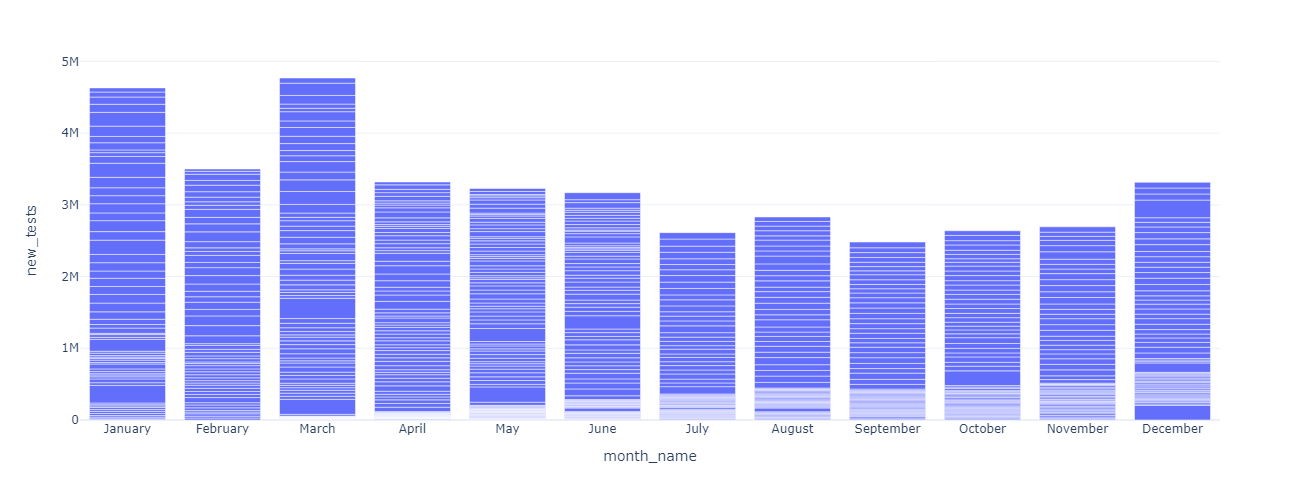

In [32]:
fig7 = px.bar(df2, x="month_name",y='new_tests')
fig7.show("png",width=1300)

In [33]:
df3 = df2[df2['year'] == 2021]

In [34]:
df3.head()

,date,year,month,day,month_name,total_cases,new_cases,total_deaths,new_tests
366,2021-01-01,2021,1,1,January,971056.081081,3841.972973,21046.882353,10412.166667
367,2021-01-02,2021,1,2,January,974387.702703,3331.621622,21114.205882,17081.636364
368,2021-01-03,2021,1,3,January,977721.189189,3333.486486,21188.058824,13962.909091
369,2021-01-04,2021,1,4,January,981428.135135,3706.945946,21273.352941,20960.833333
370,2021-01-05,2021,1,5,January,986676.243243,5248.108108,21385.029412,28170.166667


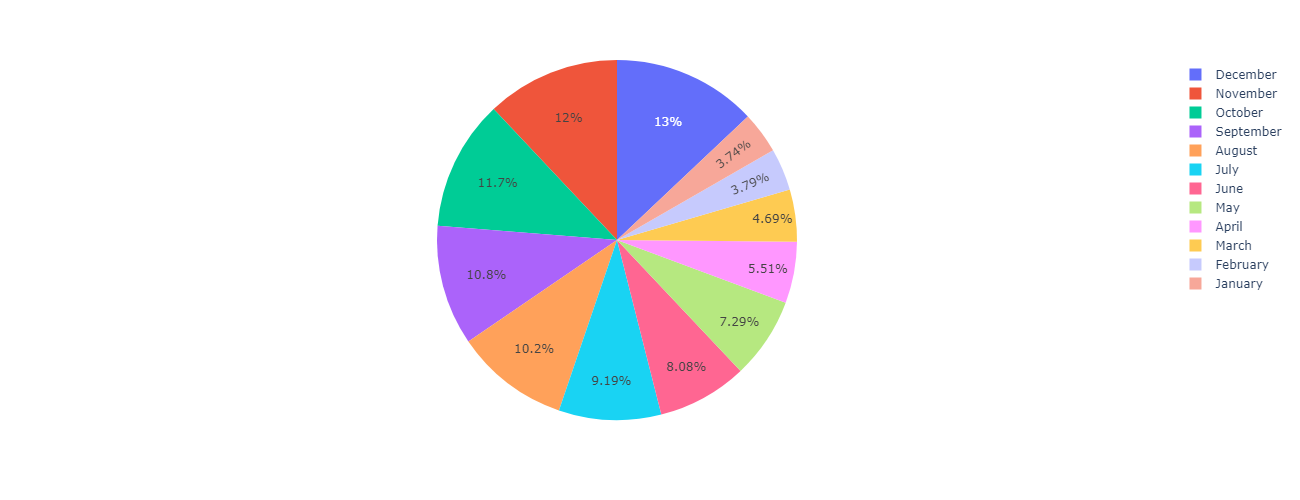

In [35]:
fig8 = px.pie(df3,names='month_name',values='total_cases',hover_data=['new_cases','total_deaths','new_tests'])
fig8.show("png",width=1300)

# **Thank You**